In [1]:
import numpy as np
import json
import os
import random
from build import GraphDomain
from GA import *

In [2]:
sc = "Datasets/IDPCDU_Edges/set2/"
TaskNames = os.listdir(sc)
TaskNames.sort()
for i in range(len(TaskNames)):
    print(i, TaskNames[i])

0 idpc_100x100x1000000.idpc
1 idpc_100x200x2296097.idpc
2 idpc_100x50x461319.idpc
3 idpc_50x100x285357.idpc
4 idpc_50x25x38961.idpc
5 idpc_50x50x125000.idpc
6 idpc_60x120x434337.idpc
7 idpc_60x30x99470.idpc
8 idpc_60x60x216000.idpc
9 idpc_70x140x923343.idpc
10 idpc_70x35x120810.idpc
11 idpc_70x70x343000.idpc
12 idpc_80x160x1490468.idpc
13 idpc_80x40x175762.idpc
14 idpc_80x80x512000.idpc
15 idpc_90x180x1644367.idpc
16 idpc_90x45x260195.idpc
17 idpc_90x90x729000.idpc


In [3]:
def Load(index):
    path = sc + TaskNames[index]
    name = TaskNames[index].split('.')[0]
    task = GraphDomain(path=path, name=name)
    return task

In [ ]:
import json
import time

# Task: 0 -> 17
for i in range(4,5):
    history = dict()

    task = Load(i)
    total_time = 0

    for j in range(30):
        np.random.seed(j)
        random.seed(j)
        task.best = np.inf

        ga = GA(100, 500, 0.7, 0.1, task=task)

        start_time = time.time()
        log = ga.run()
        end_time = time.time()
    
        history[j] = log
        total_time += end_time - start_time

    path = 'Result/GA_result/set2/' + TaskNames[i] + '.json'
    with open(path, "w", encoding="utf-8") as outfile:
        json.dump(history, outfile)

    with open('Result/GA_result/set2/runtime_'+TaskNames[i], 'w') as outfile:
        outfile.writelines(TaskNames[i] + '\n')
        outfile.writelines('total_time: {} secsonds\n'.format(total_time))
        outfile.writelines('average_time: {} secsonds'.format(total_time/30))


In [7]:
for i in range(24):
    path = 'Result/GA_result/set1/' + TaskNames[i] + ".json"
    log = {}
    with open(path, "r", encoding="utf-8") as infile:
        log = json.load(infile)

    avg = 0
    best = np.inf
    for j in range(30):
        avg += log[str(j)]["499"]
        best = min(best, log[str(j)]["499"])

    print(i, " ", TaskNames[i], "  \t", best, "\t", avg/30)


0   idpc_10x10x1000.idpc   	 7.0 	 11.8
1   idpc_10x20x2713.idpc   	 12.0 	 12.0
2   idpc_10x5x425.idpc   	 7.0 	 7.0
3   idpc_15x15x3375.idpc   	 16.0 	 16.666666666666668
4   idpc_15x30x12111.idpc   	 16.0 	 16.966666666666665
5   idpc_15x7x1504.idpc   	 10.0 	 10.8
6   idpc_20x10x2492.idpc   	 15.0 	 21.766666666666666
7   idpc_20x20x8000.idpc   	 21.0 	 21.766666666666666
8   idpc_20x40x26104.idpc   	 22.0 	 22.0
9   idpc_25x12x4817.idpc   	 27.0 	 27.7
10   idpc_25x25x15625.idpc   	 26.0 	 26.866666666666667
11   idpc_25x50x57147.idpc   	 26.0 	 26.833333333333332
12   idpc_30x15x10025.idpc   	 33.0 	 33.8
13   idpc_30x30x27000.idpc   	 32.0 	 32.06666666666667
14   idpc_30x60x89772.idpc   	 32.0 	 32.0
15   idpc_35x17x13934.idpc   	 38.0 	 38.0
16   idpc_35x35x42875.idpc   	 37.0 	 37.0
17   idpc_35x70x123585.idpc   	 37.0 	 37.0
18   idpc_40x20x18485.idpc   	 42.0 	 42.0
19   idpc_40x40x64000.idpc   	 42.0 	 42.13333333333333
20   idpc_40x80x130681.idpc   	 42.0 	 42.0
21   idpc

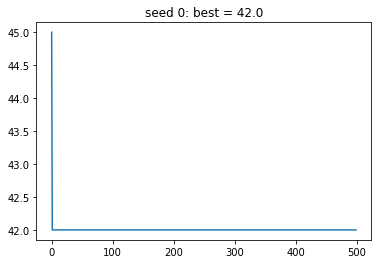

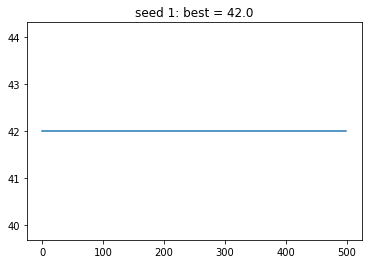

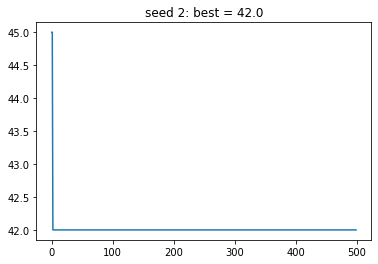

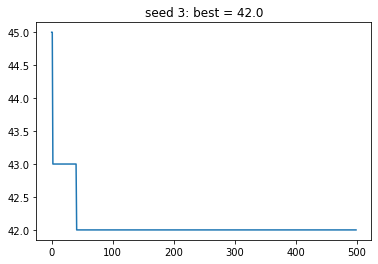

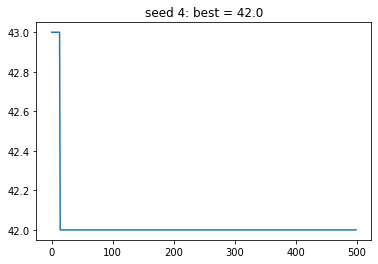

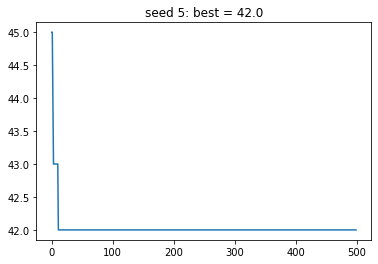

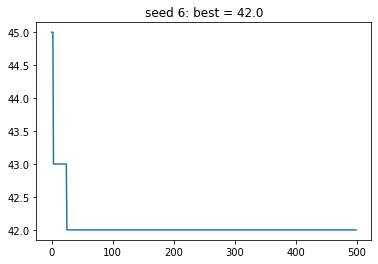

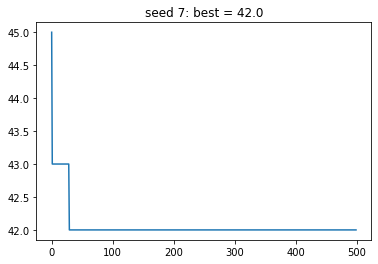

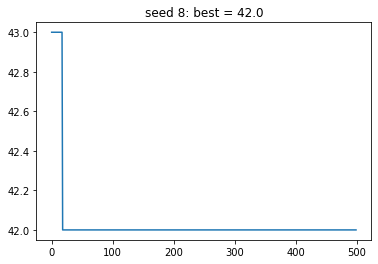

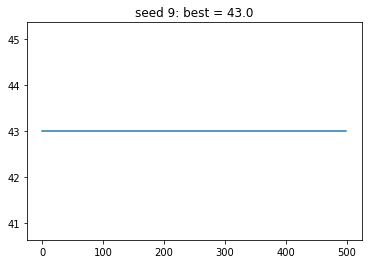

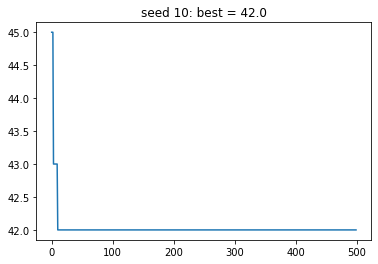

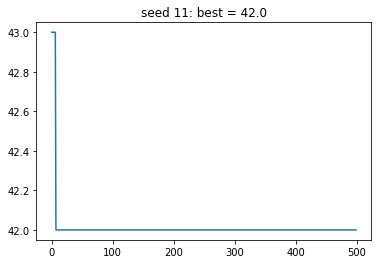

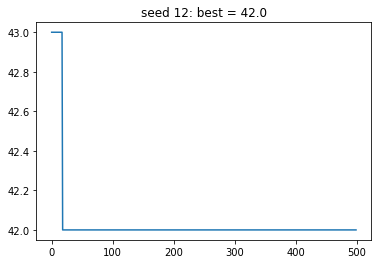

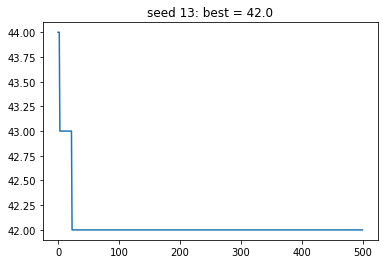

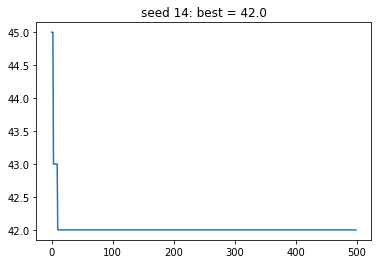

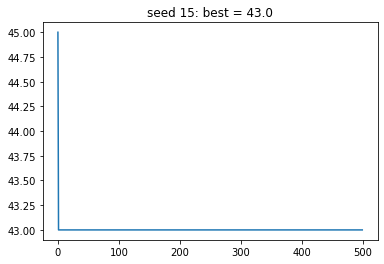

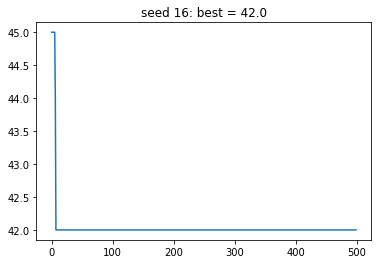

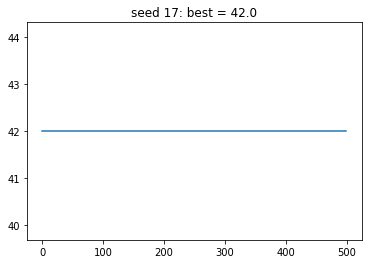

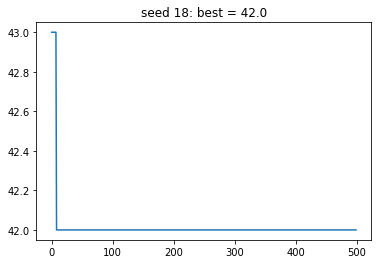

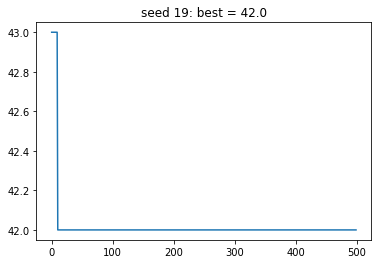

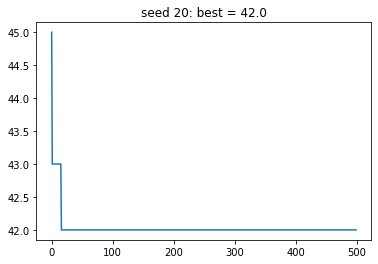

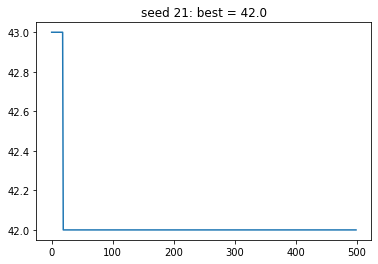

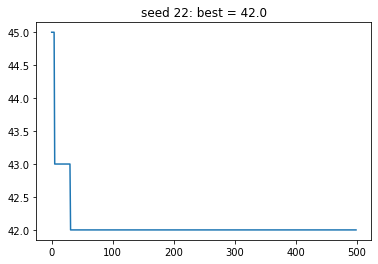

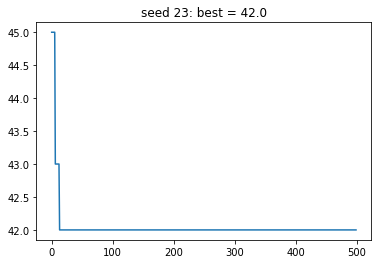

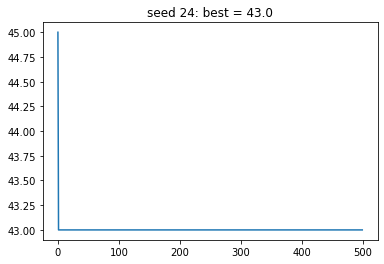

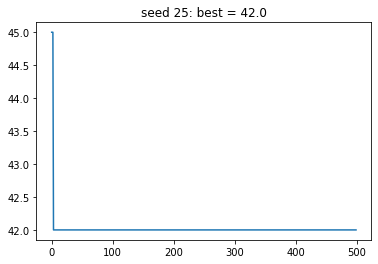

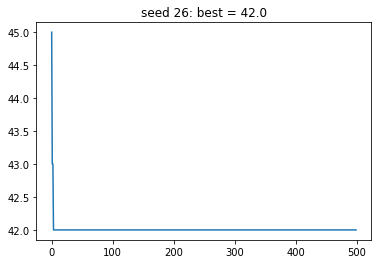

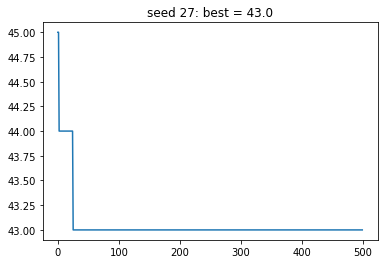

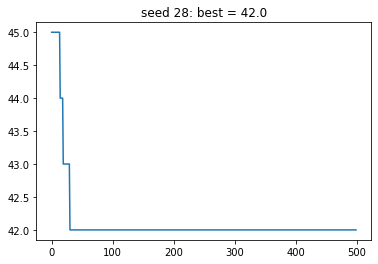

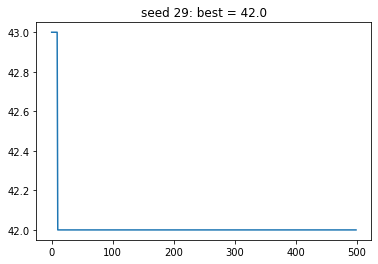

In [37]:
import matplotlib.pyplot as plt

path = 'Result/GA_result/set1/' + TaskNames[19] + ".json"
log = {}
with open(path, "r", encoding="utf-8") as infile:
    log = json.load(infile)
    
for i in range(30):
    x = np.array(range(500))
    y = np.array(list(log[str(i)].values()))

    plt.plot(x, y)
    plt.title('seed ' + str(i) + ': best = ' + str(log[str(i)]["499"]))
    plt.show()

In [ ]:
import pandas as pd
import json

res = {}

for i in range(24):
    path = 'Result/GA_result/set1/' + TaskNames[i] + ".json"
    log = {}
    with open(path, "r", encoding="utf-8") as infile:
        log = json.load(infile)
    df = pd.DataFrame.from_dict(log)
    df.to_csv (r'Result/GA_result/set1/'+TaskNames[i]+'.csv', index_label='generation', header=True)
    
    avg = 0
    best = np.inf
    for j in range(30):
        avg += log[str(j)]["499"]
        best = min(best, log[str(j)]["499"])

    res[i] = {"Datasets": TaskNames[i], "BEST": best, "AVG": avg/30}


df = pd.DataFrame.from_dict(res, orient='index')
df.to_csv (r'Result/GA_result/set1/Result_set1.csv', index_label='ID', header=True)
